In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Importamos los datos

In [2]:
miami = pd.read_csv('first_game_miami.csv')
miami.head()

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,Jimmy Butler\butleji01,33:25,8,13,0.615,2,4,0.500,5,5,...,0,2,2,5,2,0,2,0,23,-14
1,Duncan Robinson\robindu01,27:03,0,3,0.000,0,3,0.000,0,0,...,0,4,4,0,0,0,0,2,0,-8
2,Jae Crowder\crowdja01,24:30,4,8,0.500,4,7,0.571,0,0,...,0,2,2,0,0,2,0,3,12,-21
3,Bam Adebayo\adebaba01,21:10,2,8,0.250,0,0,NaN,4,6,...,2,2,4,0,0,0,0,2,8,-12
4,Goran Dragić\dragigo01,14:50,3,8,0.375,0,1,0.000,0,0,...,0,1,1,3,2,0,1,0,6,1


Observamos el tipo de dato de las columnas

In [3]:
miami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Starters  11 non-null     object 
 1   MP        11 non-null     object 
 2   FG        11 non-null     int64  
 3   FGA       11 non-null     int64  
 4   FG%       11 non-null     float64
 5   3P        11 non-null     int64  
 6   3PA       11 non-null     int64  
 7   3P%       9 non-null      float64
 8   FT        11 non-null     int64  
 9   FTA       11 non-null     int64  
 10  FT%       4 non-null      float64
 11  ORB       11 non-null     int64  
 12  DRB       11 non-null     int64  
 13  TRB       11 non-null     int64  
 14  AST       11 non-null     int64  
 15  STL       11 non-null     int64  
 16  BLK       11 non-null     int64  
 17  TOV       11 non-null     int64  
 18  PF        11 non-null     int64  
 19  PTS       11 non-null     int64  
 20  +/-       11 non-null     int64  


Accedemos a las dos primeras columnas con iloc

In [4]:
miami.iloc[:, :2]

,Starters,MP
0,Jimmy Butler\butleji01,33:25
1,Duncan Robinson\robindu01,27:03
2,Jae Crowder\crowdja01,24:30
3,Bam Adebayo\adebaba01,21:10
4,Goran Dragić\dragigo01,14:50
5,Tyler Herro\herroty01,30:15
6,Andre Iguodala\iguodan01,25:23
7,Kendrick Nunn\nunnke01,19:49
8,Kelly Olynyk\olynyke01,18:04
9,Solomon Hill\hillso01,18:02


# Realizamos transformaciones a las columnas

Convertimos los valores NaN a 0

In [5]:
miami.fillna(0, inplace=True)

Cambiamos el nombre de la columna Starters

In [6]:
miami.rename(columns={'Starters':'players'}, inplace=True)

Observamos los valores de la columna players

In [12]:
miami.players

0        Jimmy Butler\butleji01
1     Duncan Robinson\robindu01
2         Jae Crowder\crowdja01
3         Bam Adebayo\adebaba01
4        Goran Dragić\dragigo01
5         Tyler Herro\herroty01
6      Andre Iguodala\iguodan01
7        Kendrick Nunn\nunnke01
8        Kelly Olynyk\olynyke01
9         Solomon Hill\hillso01
10      Derrick Jones\jonesde02
Name: players, dtype: object

In [13]:
miami.players[0]

'Jimmy Butler\\butleji01'

In [14]:
miami.players[0].split('\\')

['Jimmy Butler', 'butleji01']

In [15]:
miami.players[0].split('\\')[0]

'Jimmy Butler'

In [16]:
name = lambda name: name.split('\\')[0]

name(miami.players[0])

'Duncan Robinson'

Aplicamos lambda a las columnas players y MP

In [17]:
miami['players'] = miami.players.apply(lambda x: x.split('\\')[0])

In [18]:
miami['MP'] = miami.MP.apply(lambda x: int(x.split(':')[0]))

In [19]:
miami.iloc[:, :2]

,players,MP
0,Jimmy Butler,33
1,Duncan Robinson,27
2,Jae Crowder,24
3,Bam Adebayo,21
4,Goran Dragić,14
5,Tyler Herro,30
6,Andre Iguodala,25
7,Kendrick Nunn,19
8,Kelly Olynyk,18
9,Solomon Hill,18


# Aplicación de la estadística avanzada

Filtramos el dataset para ver los datos de dos jugadores.

In [20]:
miami[(miami.players == 'Jimmy Butler') | (miami.players == 'Kendrick Nunn')]

,players,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,Jimmy Butler,33,8,13,0.615,2,4,0.5,5,5,...,0,2,2,5,2,0,2,0,23,-14
7,Kendrick Nunn,19,8,11,0.727,2,4,0.5,0,0,...,1,4,5,2,0,0,0,0,18,8


In [21]:
miami[(miami.players == 'Jimmy Butler') | (miami.players == 'Kendrick Nunn')][['players', 'PTS']]

,players,PTS
0,Jimmy Butler,23
7,Kendrick Nunn,18


Creamos la columna puntos por minuto

In [22]:
miami['ppm'] = miami.PTS / miami.MP
miami[['players','PTS', 'MP', 'ppm']].head()

,players,PTS,MP,ppm
0,Jimmy Butler,23,33,0.696970
1,Duncan Robinson,0,27,0.000000
2,Jae Crowder,12,24,0.500000
3,Bam Adebayo,8,21,0.380952
4,Goran Dragić,6,14,0.428571


Aplicamos la función ``round`` para tener solo dos decimales.

In [23]:
miami['ppm'] = np.round(miami.PTS / miami.MP, 2)
miami[['players','PTS', 'MP', 'ppm']].head()

,players,PTS,MP,ppm
0,Jimmy Butler,23,33,0.70
1,Duncan Robinson,0,27,0.00
2,Jae Crowder,12,24,0.50
3,Bam Adebayo,8,21,0.38
4,Goran Dragić,6,14,0.43


In [24]:
miami[(miami.players == 'Jimmy Butler') | (miami.players == 'Kendrick Nunn')][['players','PTS', 'MP', 'ppm']]

,players,PTS,MP,ppm
0,Jimmy Butler,23,33,0.70
7,Kendrick Nunn,18,19,0.95


# Posesión

In [25]:
miami['poss'] = miami.FGA + miami['3PA'] + (miami.FTA * 0.44) + miami.TOV + miami.ORB
miami[['players', 'MP','PTS','ppm','poss']]

,players,MP,PTS,ppm,poss
0,Jimmy Butler,33,23,0.70,21.20
1,Duncan Robinson,27,0,0.00,6.00
2,Jae Crowder,24,12,0.50,15.00
3,Bam Adebayo,21,8,0.38,12.64
4,Goran Dragić,14,6,0.43,10.00
5,Tyler Herro,30,14,0.47,28.44
6,Andre Iguodala,25,7,0.28,12.00
7,Kendrick Nunn,19,18,0.95,16.00
8,Kelly Olynyk,18,4,0.22,8.88
9,Solomon Hill,18,4,0.22,10.00


# Uso de posesiones 

Porcentaje de uso de posesiones.

In [28]:
miami['poss_a%'] = np.round(miami.poss / miami.poss.sum(),2)

## Eficiencia en cada posesion
El rendimiento que obtuvo de cada posesion.

In [29]:
miami['pp_pos'] = np.round(miami.PTS / miami.poss,2)
miami[['players', 'MP','PTS','poss','poss_a%', 'pp_pos']]

,players,MP,PTS,poss,poss_a%,pp_pos
0,Jimmy Butler,33,23,21.20,0.15,1.08
1,Duncan Robinson,27,0,6.00,0.04,0.00
2,Jae Crowder,24,12,15.00,0.10,0.80
3,Bam Adebayo,21,8,12.64,0.09,0.63
4,Goran Dragić,14,6,10.00,0.07,0.60
5,Tyler Herro,30,14,28.44,0.20,0.49
6,Andre Iguodala,25,7,12.00,0.08,0.58
7,Kendrick Nunn,19,18,16.00,0.11,1.12
8,Kelly Olynyk,18,4,8.88,0.06,0.45
9,Solomon Hill,18,4,10.00,0.07,0.40


# Eficiencia en los tiros

In [26]:
# Tiros de 2 anotados
miami['2P'] = miami.FG - miami['3P']

# Tiros de 2 intentados
miami['2PA'] = miami.FGA - miami['3PA']

# Porcentaje de acierto en tiro de 2
miami['2P%'] = np.round(miami['2P'] / miami['2PA'],2)

# Calcular los puntos por minutos de los diferentes lanzamientos
miami['ppt2'] = np.round((miami['2P'] * 2) / miami['2PA'],2)
miami['ppt3'] = np.round((miami['3P'] * 3) / miami['3PA'],2)
miami['ppt'] = np.round((miami['2P'] * 2 + miami['3P'] * 3)/(miami['2PA'] + miami['3PA']),2)

miami.fillna(0, inplace=True)
miami[['players', 'MP','PTS','2P','2PA','3P','3PA', '2P%', '3P%', 'FG%', 'ppt2', 'ppt3', 'ppt']]

,players,MP,PTS,2P,2PA,3P,3PA,2P%,3P%,FG%,ppt2,ppt3,ppt
0,Jimmy Butler,33,23,6,9,2,4,0.67,0.500,0.615,1.33,1.50,1.38
1,Duncan Robinson,27,0,0,0,0,3,0.00,0.000,0.000,0.00,0.00,0.00
2,Jae Crowder,24,12,0,1,4,7,0.00,0.571,0.500,0.00,1.71,1.50
3,Bam Adebayo,21,8,2,8,0,0,0.25,0.000,0.250,0.50,0.00,0.50
4,Goran Dragić,14,6,3,7,0,1,0.43,0.000,0.375,0.86,0.00,0.75
5,Tyler Herro,30,14,4,10,2,8,0.40,0.250,0.333,0.80,0.75,0.78
6,Andre Iguodala,25,7,2,5,1,2,0.40,0.500,0.429,0.80,1.50,1.00
7,Kendrick Nunn,19,18,6,7,2,4,0.86,0.500,0.727,1.71,1.50,1.64
8,Kelly Olynyk,18,4,1,3,0,2,0.33,0.000,0.200,0.67,0.00,0.40
9,Solomon Hill,18,4,2,2,0,4,1.00,0.000,0.333,2.00,0.00,0.67


# Distribución de lanzamiento

In [27]:
miami['t2a%'] = np.round(miami['2PA'] / miami['2PA'].sum(),2)
miami['t3a%'] = np.round(miami['3PA'] / miami['3PA'].sum(),2)
miami['ta%'] = np.round(miami.FGA / miami.FGA.sum(),2)
miami[['players', 'MP','PTS', '2P%', '3P%', 'FG%','ppt2', 'ppt3', 'ppt', 't2a%','t3a%', 'ta%']]

,players,MP,PTS,2P%,3P%,FG%,ppt2,ppt3,ppt,t2a%,t3a%,ta%
0,Jimmy Butler,33,23,0.67,0.500,0.615,1.33,1.50,1.38,0.17,0.11,0.15
1,Duncan Robinson,27,0,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.09,0.03
2,Jae Crowder,24,12,0.00,0.571,0.500,0.00,1.71,1.50,0.02,0.20,0.09
3,Bam Adebayo,21,8,0.25,0.000,0.250,0.50,0.00,0.50,0.15,0.00,0.09
4,Goran Dragić,14,6,0.43,0.000,0.375,0.86,0.00,0.75,0.13,0.03,0.09
5,Tyler Herro,30,14,0.40,0.250,0.333,0.80,0.75,0.78,0.19,0.23,0.20
6,Andre Iguodala,25,7,0.40,0.500,0.429,0.80,1.50,1.00,0.09,0.06,0.08
7,Kendrick Nunn,19,18,0.86,0.500,0.727,1.71,1.50,1.64,0.13,0.11,0.12
8,Kelly Olynyk,18,4,0.33,0.000,0.200,0.67,0.00,0.40,0.06,0.06,0.06
9,Solomon Hill,18,4,1.00,0.000,0.333,2.00,0.00,0.67,0.04,0.11,0.07


# Proceso de automatizacion

In [35]:
lakers = pd.read_csv('first_game_lakers.csv')
lakers.head()

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,Anthony Davis\davisan02,38:04,11,21,0.524,2,4,0.500,10,10,...,3,6,9,5,0,3,1,1,34,23
1,LeBron James\jamesle01,36:24,9,17,0.529,2,4,0.500,5,6,...,1,12,13,9,1,0,2,3,25,10
2,Kentavious Caldwell-Pope\caldwke01,30:26,3,10,0.300,2,6,0.333,5,5,...,0,2,2,0,2,1,1,1,13,2
3,Danny Green\greenda02,29:32,4,9,0.444,3,8,0.375,0,0,...,0,4,4,1,2,3,2,1,11,21
4,Dwight Howard\howardw01,14:55,0,0,NaN,0,0,NaN,2,2,...,1,7,8,2,0,0,1,3,2,-2


Funcion para extraer y limpiar los datos

In [36]:
def clean_data(file_path):
    df = pd.read_csv(file_path)
    df.fillna(0, inplace=True)
    df.rename(columns={'Starters':'players'}, inplace=True)
    df['MP'] = df.MP.apply(lambda x: int(x.split(':')[0]))
    df['players'] = df.players.apply(lambda x: x.split('\\')[0])
    return df

In [37]:
lakers = clean_data('first_game_lakers.csv')
lakers.head()

,players,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,Anthony Davis,38,11,21,0.524,2,4,0.500,10,10,...,3,6,9,5,0,3,1,1,34,23
1,LeBron James,36,9,17,0.529,2,4,0.500,5,6,...,1,12,13,9,1,0,2,3,25,10
2,Kentavious Caldwell-Pope,30,3,10,0.300,2,6,0.333,5,5,...,0,2,2,0,2,1,1,1,13,2
3,Danny Green,29,4,9,0.444,3,8,0.375,0,0,...,0,4,4,1,2,3,2,1,11,21
4,Dwight Howard,14,0,0,0.000,0,0,0.000,2,2,...,1,7,8,2,0,0,1,3,2,-2


Función para crear las metricas de estadística avanzada.

In [38]:
def adv_stats(df, *args):
    
    # Posesion
    df['poss'] = np.round(df.FGA + df['3PA'] + (df.FTA * 0.44) + df.TOV + df.ORB, 2)
    df['TO%'] = np.round(df.TOV / df.poss,2)
    df['AST%'] = np.round(df.AST / (df.poss + df.AST),2)
    
     # Shots
    df['2P'] = df.FG - df['3P']
    df['2PA'] = df.FGA - df['3PA']
    df['ppt2'] = np.round((df['2P'] * 2) / df['2PA'], 2)
    df['ppt3'] = np.round((df['3P'] * 3) / df['3PA'], 2)
    
    # Distribution
    df['t2a%'] = np.round(df['2PA'] / df['2PA'].sum(), 2)
    df['t3a%'] = np.round(df['3PA'] / df['3PA'].sum(), 2)
    df['ta%'] = np.round(df.FGA / df.FGA.sum(), 2)
    df['poss_a%'] = np.round(df.poss / df.poss.sum(), 2)
    
    # Points
    df['ppm'] = np.round(df.PTS / df.MP, 2)
    df['ppt'] = np.round((df['2P'] * 2 + df['3P'] * 3)/(df['2PA'] + df['3PA']), 2)
    df['pp_pos'] = np.round(df.PTS / df.poss, 2)
    
    df.fillna(0, inplace=True)
    
    if len(args) == 0:
        return df
    
    return df[list(args)]

In [39]:
lakers.columns

Index(['players', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       '+/-'],
      dtype='object')

Analizamos la posesión

In [40]:
adv_stats(lakers, 'players', 'MP','PTS','poss','poss_a%','pp_pos')

,players,MP,PTS,poss,poss_a%,pp_pos
0,Anthony Davis,38,34,33.40,0.22,1.02
1,LeBron James,36,25,26.64,0.17,0.94
2,Kentavious Caldwell-Pope,30,13,19.20,0.12,0.68
3,Danny Green,29,11,19.00,0.12,0.58
4,Dwight Howard,14,2,2.88,0.02,0.69
5,Rajon Rondo,24,7,14.88,0.10,0.47
6,Kyle Kuzma,22,3,14.00,0.09,0.21
7,Alex Caruso,21,10,11.88,0.08,0.84
8,Markieff Morris,17,8,11.00,0.07,0.73
9,Quinn Cook,1,3,2.00,0.01,1.50


Analizamos el tiro

In [41]:
adv_stats(lakers, 'players', 'MP','PTS','t2a%','ppt2', 't3a%', 'ppt3')

,players,MP,PTS,t2a%,ppt2,t3a%,ppt3
0,Anthony Davis,38,34,0.37,1.06,0.11,1.50
1,LeBron James,36,25,0.28,1.08,0.11,1.50
2,Kentavious Caldwell-Pope,30,13,0.09,0.50,0.16,1.00
3,Danny Green,29,11,0.02,2.00,0.21,1.12
4,Dwight Howard,14,2,0.00,0.00,0.00,0.00
5,Rajon Rondo,24,7,0.04,1.00,0.13,0.60
6,Kyle Kuzma,22,3,0.07,0.00,0.11,0.75
7,Alex Caruso,21,10,0.07,2.00,0.08,1.00
8,Markieff Morris,17,8,0.07,0.67,0.08,2.00
9,Quinn Cook,1,3,0.00,0.00,0.03,3.00


In [42]:
lakers = adv_stats(lakers)

In [43]:
miami = adv_stats(clean_data('first_game_miami.csv'))

Creamos la columna team con el nombre del equipo y concatenamos.

In [44]:
lakers['team'] = 'Lakers'
miami['team'] = 'Miami'

game_1 = pd.concat([lakers, miami])

In [45]:
game_1

,players,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ppt2,ppt3,t2a%,t3a%,ta%,poss_a%,ppm,ppt,pp_pos,team
0,Anthony Davis,38,11,21,0.524,2,4,0.500,10,10,...,1.06,1.50,0.37,0.11,0.25,0.22,0.89,1.14,1.02,Lakers
1,LeBron James,36,9,17,0.529,2,4,0.500,5,6,...,1.08,1.50,0.28,0.11,0.20,0.17,0.69,1.18,0.94,Lakers
2,Kentavious Caldwell-Pope,30,3,10,0.300,2,6,0.333,5,5,...,0.50,1.00,0.09,0.16,0.12,0.12,0.43,0.80,0.68,Lakers
3,Danny Green,29,4,9,0.444,3,8,0.375,0,0,...,2.00,1.12,0.02,0.21,0.11,0.12,0.38,1.22,0.58,Lakers
4,Dwight Howard,14,0,0,0.000,0,0,0.000,2,2,...,0.00,0.00,0.00,0.00,0.00,0.02,0.14,0.00,0.69,Lakers
5,Rajon Rondo,24,2,7,0.286,1,5,0.200,2,2,...,1.00,0.60,0.04,0.13,0.08,0.10,0.29,0.71,0.47,Lakers
6,Kyle Kuzma,22,1,7,0.143,1,4,0.250,0,0,...,0.00,0.75,0.07,0.11,0.08,0.09,0.14,0.43,0.21,Lakers
7,Alex Caruso,21,4,6,0.667,1,3,0.333,1,2,...,2.00,1.00,0.07,0.08,0.07,0.08,0.48,1.50,0.84,Lakers
8,Markieff Morris,17,3,6,0.500,2,3,0.667,0,0,...,0.67,2.00,0.07,0.08,0.07,0.07,0.47,1.33,0.73,Lakers
9,Quinn Cook,1,1,1,1.000,1,1,1.000,0,0,...,0.00,3.00,0.00,0.03,0.01,0.01,3.00,3.00,1.50,Lakers


Realizamos un ``groupby``

In [46]:
game_1.groupby('team').agg({'poss':'sum','PTS':'sum','FG':'sum','2P':'sum','3P':'sum','FGA':'sum',
                            '2PA':'sum','3PA':'sum'})

,poss,PTS,FG,2P,3P,FGA,2PA,3PA
team,,,,,,,,
Lakers,154.88,116,38,23,15,84,46,38
Miami,143.16,98,38,27,11,89,54,35


Creamos la función que concatena y agrupa.

In [57]:
def group_total(df1, df2, team1, team2):
    df1['team'] = team1
    df2['team'] = team2
    df = pd.concat([df1, df2])
    df = df.groupby('team').agg({'poss':'sum','PTS':'sum','FG':'sum','2P':'sum',
                                 '3P':'sum','FGA':'sum','2PA':'sum','3PA':'sum'})
    # Shots
    df['ppt2'] = np.round((df['2P'] * 2) / df['2PA'], 2)
    df['ppt3'] = np.round((df['3P'] * 3) / df['3PA'], 2)
    df['2P%'] = np.round(df['2P'] / df['2PA'], 2)
    df['3P%'] = np.round(df['3P'] / df['3PA'], 2)
    
    
    # Points
    df['ppm'] = np.round(df.PTS / 48, 2)
    df['ppt'] = np.round((df['2P'] * 2 + df['3P'] * 3)/(df['2PA'] + df['3PA']), 2)
    df['pp_pos'] = np.round(df.PTS / df.poss, 2)
    
    return df

In [58]:
game_1 = group_total(lakers, miami, 'Lakers', 'Miami')
game_1

,poss,PTS,FG,2P,3P,FGA,2PA,3PA,ppt2,ppt3,2P%,3P%,ppm,ppt,pp_pos
team,,,,,,,,,,,,,,,
Lakers,154.88,116,38,23,15,84,46,38,1.0,1.18,0.5,0.39,2.42,1.08,0.75
Miami,143.16,98,38,27,11,89,54,35,1.0,0.94,0.5,0.31,2.04,0.98,0.68


# Visualización
Importamos el Radar y realizamos visualización.

In [49]:
from radar_chart import Radar

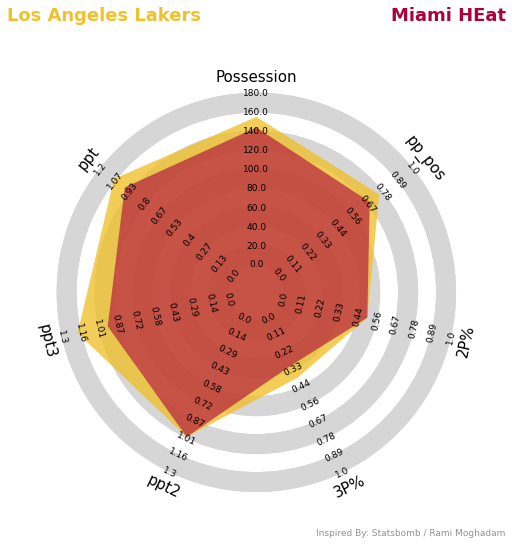

In [61]:
# Parameter names
params = ['Possession','pp_pos', '2P%', '3P%', 'ppt2','ppt3', 'ppt']

# Range Values
ranges = [(0.0, 180.0),(0, 1),(0.0, 1.0),(0.0, 1.0),(0.0, 1.3),(0.0, 1.3),(0.0, 1.2)]

# Parameter values
values = [
    [154.88, 0.75, 0.5, 0.39, 1.0, 1.18, 1.08],
    [143.16, 0.68, 0.5, 0.31, 1.0, 0.94, 0.98] ]

# Title values
title = dict(
    title_name='Los Angeles Lakers',
    title_color='#efc12d',
    #subtitle_name='',
    #subtitle_color='',
    title_name_2='Miami HEat',
    title_color_2='#aa023a',
    #subtitle_name_2='',
    #subtitle_color_2='',
    title_fontsize=18,
    subtitle_fontsize=15)


# Instantiate object
radar = Radar(label_fontsize=15, range_fontsize=9)  

# Plot radar
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                                 radar_color=['#efc12d', '#aa023a'], 
                                 alphas=[0.8, 0.6], title=title,
                                 compare=True)